# **Import Libraries:**

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [34]:
import warnings
warnings.filterwarnings('ignore')


# **Load in and explore the Dataset:**

In [35]:
df=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Data Analysis:**

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [39]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [40]:
df.shape

(891, 12)

# **Data Preprocessing and Cleaning:**

**Remove Duplicate Values:**

In [41]:
duplicate=df[df.duplicated()]
print(duplicate)


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [42]:
df = df.drop_duplicates()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Handling Missing Values:**

In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
#Fill the missing values of 'Age' with mean

avg=df['Age'].mean()
df['Age']=df['Age'].fillna(avg)

In [45]:
#drop the 'Cabin' Column

df.drop('Cabin',axis=1,inplace=True)

In [46]:
#drop the missing rows of 'Embarked' Column

df.dropna(subset=['Embarked'], axis=0, inplace=True)

In [47]:
#No missing Values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [48]:
#after removing 2 rows of the Embarked Column and 1 column 'Cabin'
df.shape

(889, 11)

**Outlier Detection:**

<Axes: xlabel='Age'>

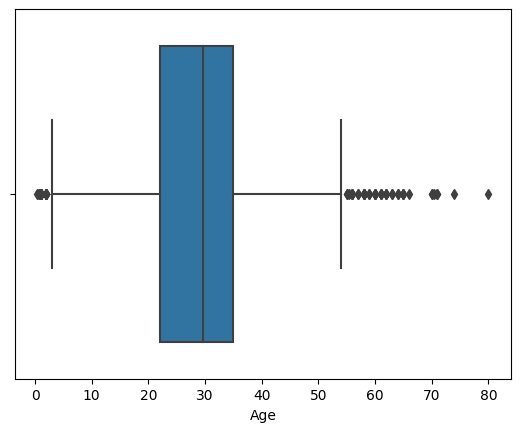

In [49]:
sns.boxplot(x=df['Age'])

In [50]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]



In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])



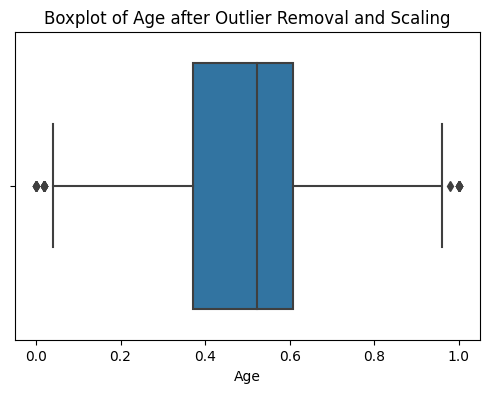

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age after Outlier Removal and Scaling")
plt.show()


<Axes: xlabel='Survived'>

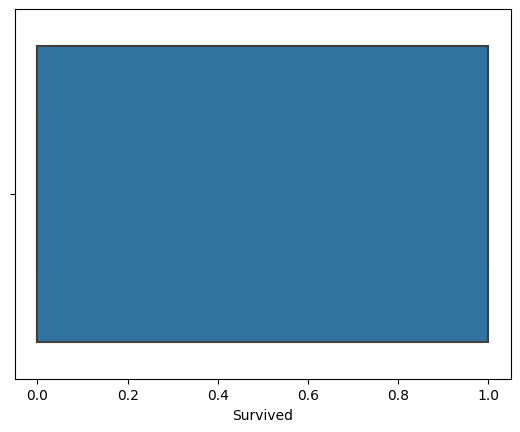

In [53]:
sns.boxplot(x=df['Survived'])

<Axes: xlabel='Pclass'>

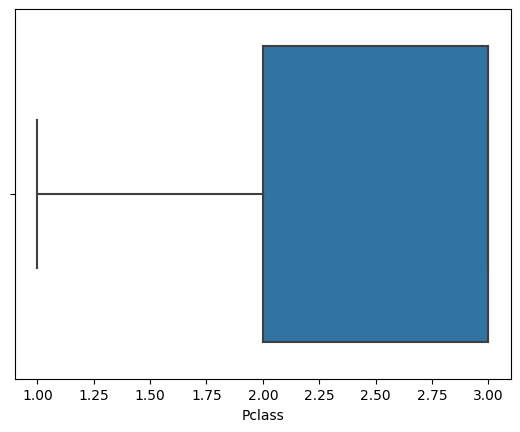

In [54]:
sns.boxplot(x=df['Pclass'])

 **Drop Unnecessary Columns:**

In [55]:
#Drop name and ticket Columns
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

**Convert categorical Feature into Numerical Values:**

**Label Encoding**

In [56]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Embarked']
le = LabelEncoder()
df[label_cols] = df[label_cols].apply(lambda col: le.fit_transform(col))


In [57]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,0.372549,1,0,7.2500,2
1,2,1,1,female,0.686275,1,0,71.2833,0
2,3,1,3,female,0.450980,0,0,7.9250,2
3,4,1,1,female,0.627451,1,0,53.1000,2
4,5,0,3,male,0.627451,0,0,8.0500,2


**One-hot Encoding**

In [59]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Sex']
le = LabelEncoder()
df[label_cols] = df[label_cols].apply(lambda col: le.fit_transform(col))

In [61]:
#after dropping two columns: "Name" , "Ticket"
df.shape

(824, 9)

# **Data Visualization:**

**Survival Rate by Gender**

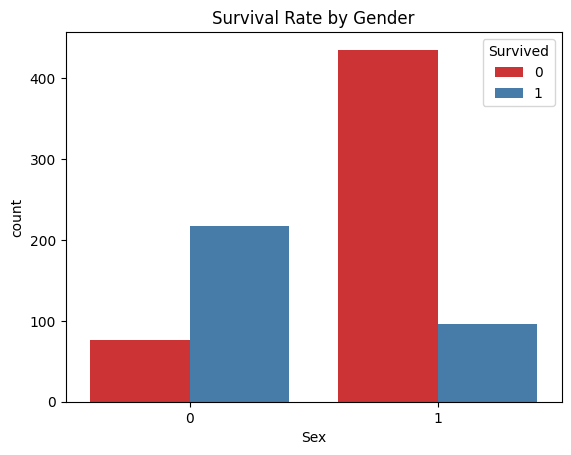

In [66]:
# Survival by Gender
# most of the MALE had Died.
# Most of the FEMALE had Survived.
sns.countplot(data=df,x="Sex",hue="Survived",palette="Set1")
plt.title("Survival Rate by Gender")
plt.show()

**Survival Rate by Passenger Class**

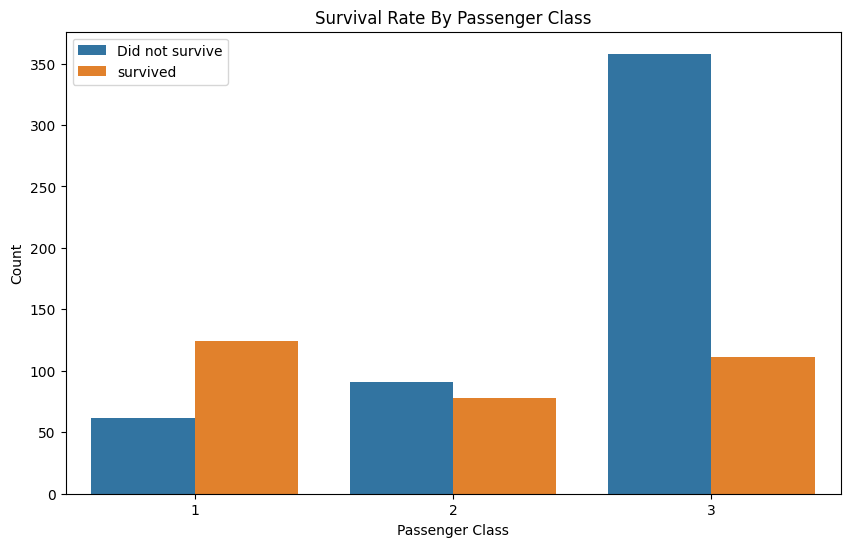

In [68]:
import matplotlib.pyplot as pit
import seaborn as sns

# Create figure and axis
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Rate By Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(labels= ["Did not survive", "survived"])
plt.show()

**Survival Rate by Age**

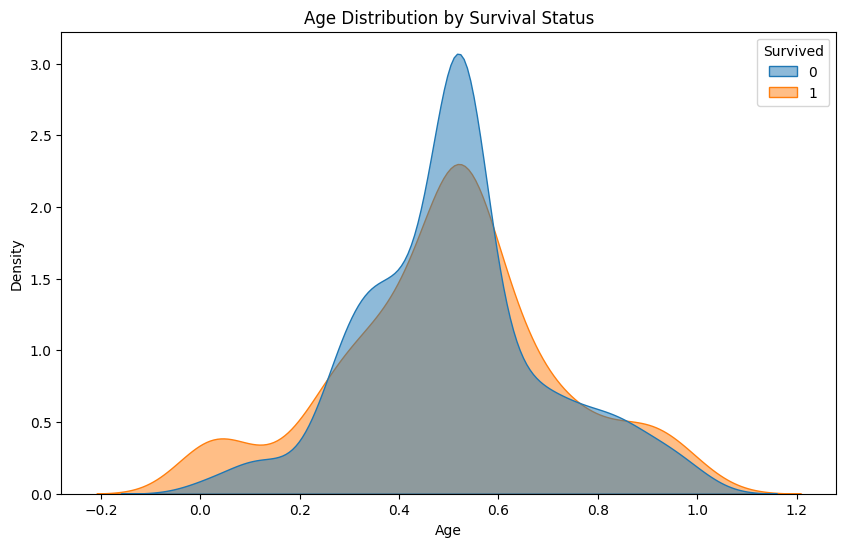

In [69]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="Age", hue="Survived", fill=True, common_norm=False, alpha=0.5)
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.show()


**Embarked Distribution:**

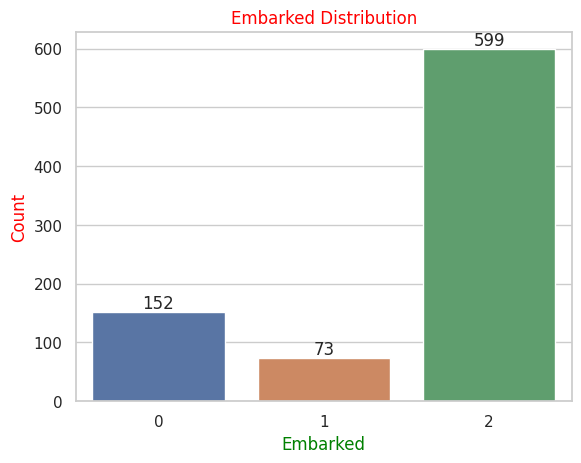

In [70]:
ax = sns.set(style="whitegrid")
ax = sns.countplot(data=df,x='Embarked');
ax.bar_label(ax.containers[0])

plt.title('Embarked Distribution',color='Red',loc='center',font='Lucida Calligraphy');
plt.xlabel('Embarked',color='Green',loc='center',font='Lucida Calligraphy')
plt.ylabel('Count',color='Red',loc='center',font='Lucida Calligraphy');

# **Train-Test Split**

In [71]:
x=df.drop('Survived', axis=1)
y=df['Survived']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=400)

# Training:

In [72]:
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# log=LogisticRegression()
# log.fit(x_train, y_train)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(x_train, y_train)
Y_pred = decision.predict(x_test)

decision_train = round(decision.score(x_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",decision_train)
print("Model Accuracy Score  :",decision_accuracy)



Training Accuracy     : 100.0
Model Accuracy Score  : 75.76


## Prediction:

In [73]:
y_pred=decision.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0]


In [74]:
y_pred.shape

(165,)

In [75]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
acc=accuracy_score(y_test, y_pred)
print(acc)

[[89 14]
 [26 36]]
0.7575757575757576


# **Evaluation Metrices:**

# **Confuion Matrix**

Accuracy: 0.7575757575757576

Confusion Matrix:
 [[89 14]
 [26 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.82       103
           1       0.72      0.58      0.64        62

    accuracy                           0.76       165
   macro avg       0.75      0.72      0.73       165
weighted avg       0.75      0.76      0.75       165



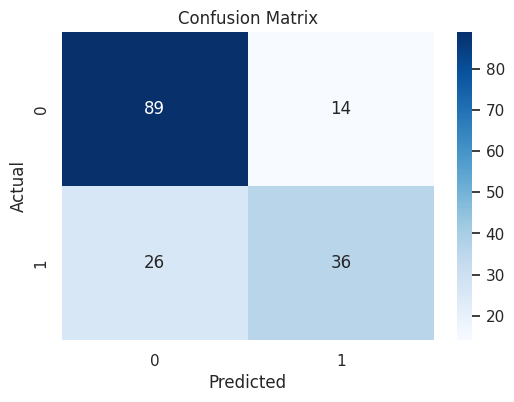

In [83]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [84]:
co=df.corr()
print(co)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.015866 -0.037108  0.039365  0.050168 -0.054004   
Survived       -0.015866  1.000000 -0.366204 -0.552140 -0.028750 -0.030172   
Pclass         -0.037108 -0.366204  1.000000  0.156008 -0.284954  0.056938   
Sex             0.039365 -0.552140  0.156008  1.000000  0.060270 -0.123239   
Age             0.050168 -0.028750 -0.284954  0.060270  1.000000 -0.181730   
SibSp          -0.054004 -0.030172  0.056938 -0.123239 -0.181730  1.000000   
Parch          -0.006968  0.074975  0.017887 -0.263852 -0.130644  0.408337   
Fare            0.017033  0.268587 -0.551968 -0.186628  0.090317  0.167292   
Embarked        0.021738 -0.168044  0.162375  0.116004 -0.013193  0.063326   

                Parch      Fare  Embarked  
PassengerId -0.006968  0.017033  0.021738  
Survived     0.074975  0.268587 -0.168044  
Pclass       0.017887 -0.551968  0.162375  
Sex         -0.263852 -0.186628  0.116004  

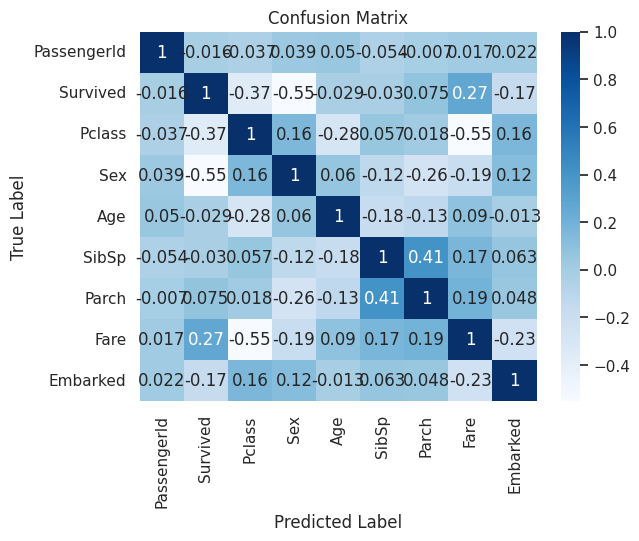

In [87]:
sns.heatmap(co, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Prediction:**

In [88]:
# --- INPUT FROM USER ---
import numpy as np

while True:
    print("\nEnter the following details for Titanic survival prediction:")

    PassengerId = int(input("Passenger ID: "))
    Pclass = int(input("Pclass (1/2/3): "))
    Age = float(input("Age: "))
    SibSp = int(input("Number of siblings/spouses aboard (SibSp): "))
    Parch = int(input("Number of parents/children aboard (Parch): "))
    Fare = float(input("Fare: "))
    
    # Label Encoded Sex
    Sex_input = input("Sex (male/female): ").strip().lower()
    Sex = 1 if Sex_input == 'male' else 0

    # Label Encoded Embarked
    Embarked_input = input("Embarked (C, Q, or S): ").strip().upper()
    if Embarked_input == 'C':
        Embarked = 0
    elif Embarked_input == 'Q':
        Embarked = 1
    elif Embarked_input == 'S':
        Embarked = 2
    else:
        print("Invalid Embarked input. Please enter C, Q, or S.")
        continue

    # Final input vector in correct order
    input_data = np.array([[PassengerId, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]])

    # Prediction
    prediction = decision.predict(input_data)[0]

    # Output
    print("\nPrediction:")
    print("✅ Survived" if prediction == 1 else "❌ Did not survive")

    # Loop decision
    cont = input("\nDo you want to make another prediction? (yes/no): ").strip().lower()
    if cont != 'yes':
        print("Exiting prediction loop.")
        break



Enter the following details for Titanic survival prediction:


Passenger ID:  3
Pclass (1/2/3):  2
Age:  34
Number of siblings/spouses aboard (SibSp):  2
Number of parents/children aboard (Parch):  1
Fare:  3.76
Sex (male/female):  1
Embarked (C, Q, or S):  2


Invalid Embarked input. Please enter C, Q, or S.

Enter the following details for Titanic survival prediction:


Passenger ID:  3
Pclass (1/2/3):  1
Age:  65
Number of siblings/spouses aboard (SibSp):  2
Number of parents/children aboard (Parch):  1
Fare:  2.45
Sex (male/female):  1
Embarked (C, Q, or S):  C



Prediction:
✅ Survived



Do you want to make another prediction? (yes/no):  no


Exiting prediction loop.


# **Save the Model:**

In [89]:
import joblib

joblib.dump(decision, "titanic_model.pkl")


['titanic_model.pkl']